In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as pyplot
import seaborn as sb

In [2]:
df = pd.read_csv('./train.csv');

In [3]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

В даному датасеті є багато пропусків.

In [6]:
df.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

З цього графіку видно, що ціну обов'язково треба нормалізувати.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

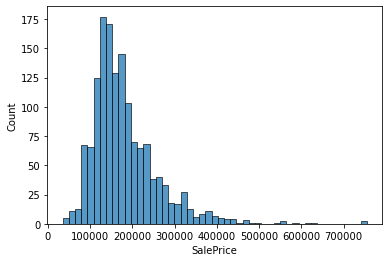

In [7]:
sb.histplot(df['SalePrice'])

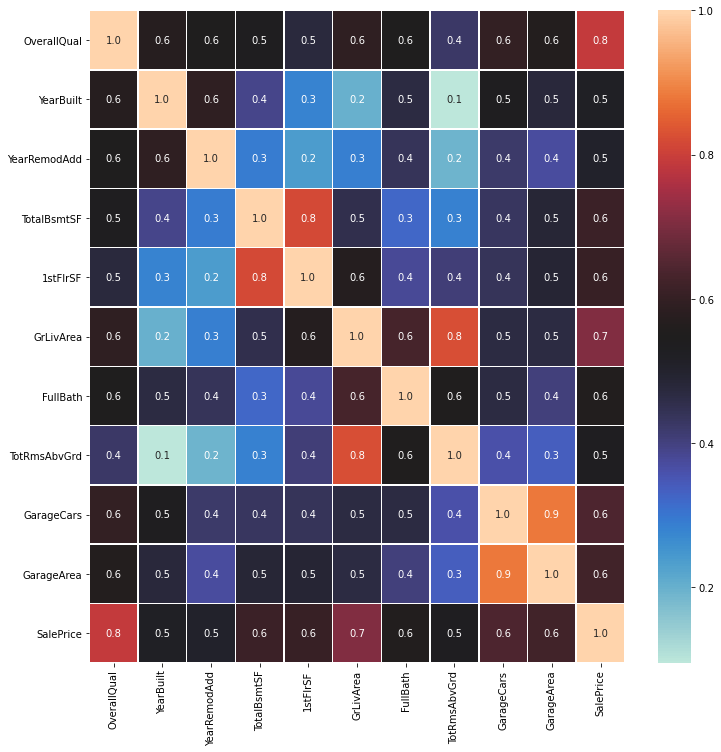

In [8]:
corr = df.corr()

highest_corr_features = corr.index[abs(corr["SalePrice"])>0.5] #Вибираємо ті де корреляція > 0.5
pyplot.figure(figsize=(12,12))
g = sb.heatmap(df[highest_corr_features].corr(),annot=True,linewidths=.5, fmt= '.1f',cmap="icefire")

In [9]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

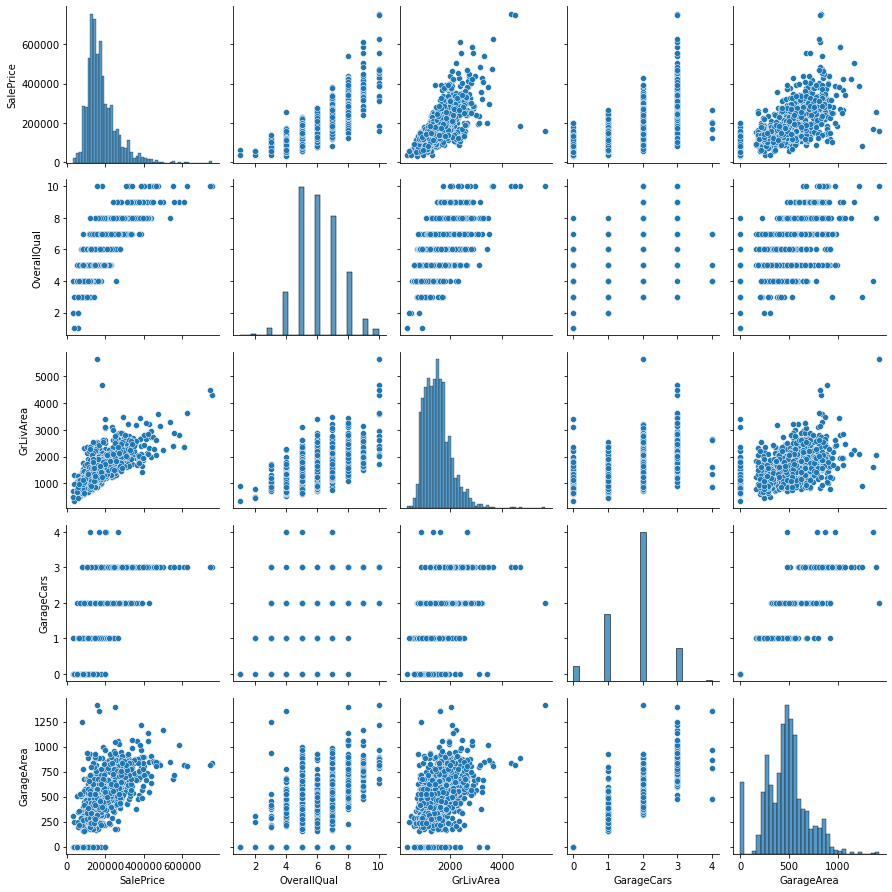

In [10]:
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea']
sb.pairplot(df[columns])
pyplot.tight_layout();
pyplot.show()

In [11]:
total = df.isnull().sum().sort_values(ascending=False)

percent = round((df.isnull().sum() / df.isnull().count())*100,2).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Empty Percent'])

result=missing_data[percent>0.05]
result.head(30)

,Total,Empty Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [12]:
df.drop((missing_data[missing_data['Total'] > 20]).index, axis=1, inplace=True)

In [13]:
total = df.isnull().sum().sort_values(ascending=False)
total.head()

MasVnrArea     8
MasVnrType     8
Electrical     1
SalePrice      0
OverallCond    0
dtype: int64

In [14]:
categorials = [];
for column in df:
    if(df[column].dtype == 'object'):
        print(column)
        categorials.append(column)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
PavedDrive
SaleType
SaleCondition


In [15]:
categorials

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [16]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
for column in categorials:
    df[column] = enc.fit_transform(df[column].fillna('None'))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   LotShape       1460 non-null   int32  
 6   LandContour    1460 non-null   int32  
 7   Utilities      1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  Condition2     1460 non-null   int32  
 13  BldgType       1460 non-null   int32  
 14  HouseStyle     1460 non-null   int32  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [18]:
df =df.fillna(df.mean())

Create model and train

In [19]:
X = df.drop(['SalePrice','Id'], axis=1)

In [20]:
y =df['SalePrice']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=42)

In [22]:
linear_regression = LinearRegression(normalize=True);

In [23]:
linear_regression.fit(X_train, y_train)

LinearRegression(normalize=True)

In [24]:
train_predicted =linear_regression.predict(X_train)
print("Train Score")
print("Mean absolute error: ",mean_absolute_error(y_train.values,train_predicted))
print("Mean squared error: ",mean_squared_error(y_train.values,train_predicted))
print("Root mean squared error: ",mean_squared_error(y_train.values,train_predicted,squared=False))
print("R2 score:",linear_regression.score(X_train, y_train))

Train Score
Mean absolute error:  18914.234300074124
Mean squared error:  984625767.8019803
Root mean squared error:  31378.747071895337
R2 score: 0.8349203703364702


In [25]:
test_predicted =linear_regression.predict(X_test)
print("Test Score")
print("Mean absolute error: ",mean_absolute_error(y_test.values,test_predicted))
print("Mean squared error: ",mean_squared_error(y_test.values,test_predicted))
print("Root mean squared error: ",mean_squared_error(y_test.values,test_predicted,squared=False))
print("R2 score:",linear_regression.score(X_test, y_test))

Test Score
Mean absolute error:  21301.268837831092
Mean squared error:  1141961417.1067533
Root mean squared error:  33792.91962980934
R2 score: 0.8511195761091972


In [26]:
coefs =linear_regression.coef_

In [27]:
future_select = pd.DataFrame(coefs,X.columns)

In [28]:
future_select.sort_values(by=[0],ascending=False).head(10)

,0
GrLivArea,2.329180e+14
TotalBsmtSF,1.689949e+14
Street,1.865767e+04
LandSlope,1.486954e+04
OverallQual,1.306401e+04
GarageCars,1.265797e+04
BsmtFullBath,1.091153e+04
MasVnrType,4.978584e+03
FullBath,4.784558e+03
Fireplaces,4.648519e+03


In [29]:
def normalize(X):
    mean = np.mean(X,axis =0)
    std = np.std(X,axis =0)
    X_new = (X-mean)/std
    #X_new = X
    return X_new, mean, std
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new
def hypothesis(X, theta):
    h_thetha = X.dot(theta);
    return h_thetha
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    J = sum((hypothesis(X,theta) - y)**2)/(2*m);
    return J
def derivative(X, y, theta):
    m = X.shape[0]
    d_thetha =np.array(    ((hypothesis(X,theta)-y).dot(X))/m    )
    return d_thetha
def gradient_descent(X, y, theta, alpha, max_num_iters,eps, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    current_iteration = 0;
    if print_J == True:
        print(J)
    J_history.append(J)

    while(True):
        delta =derivative(X, y, theta)*alpha;
        theta = theta - delta;
        J = cost_function(X, y, theta);
        if print_J == True:
            print(J);
        J_history.append(J)
        current_iteration+=1;
        if(abs(J_history[-1] - J_history[-2]) < eps or current_iteration >max_num_iters): 
            break;# досягли заданої точності чи кількості ітерацій
    return theta, J_history
def Predict(X,mean,std,theta):
    X =(X-mean)/std;
    X = prepare_X(X)
    predicted =hypothesis(X,theta);
    return predicted

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=42)
X_train_original = X_train;

In [31]:
X_train_norm, mean, std = normalize(X_train)
X_train = prepare_X(X_train_norm)
theta = np.array([0]*X_train.shape[1])

MSSubClass          56.849315
MSZoning             3.033390
LotArea          10689.642123
Street               0.996575
LotShape             1.917808
                     ...     
MiscVal             51.267123
MoSold               6.356164
YrSold            2007.818493
SaleType             7.497432
SaleCondition        3.782534
Length: 63, dtype: float64
MSSubClass          42.513651
MSZoning             0.609358
LotArea          10754.759318
Street               0.058420
LotShape             1.413641
                     ...     
MiscVal            552.802887
MoSold               2.669564
YrSold               1.322073
SaleType             1.587082
SaleCondition        1.077781
Length: 63, dtype: float64


In [32]:
print('X: {}'.format(X_train.shape))
print('y: {}'.format(y_train.shape))
print(cost_function(X_train, y_train, theta))

X: (1168, 64)
y: (1168,)
19442791762.85488


In [33]:
alpha = 0.05
max_num_iters = 10000
eps =1e-100 # точність для зупинки циклу

In [34]:
new_theta, Js = gradient_descent(X_train, y_train, theta, alpha, max_num_iters,eps, False)

In [35]:
new_theta

array([ 1.81441542e+05, -4.12381848e+03, -4.14273336e+02,  2.84191243e+03,
        1.11396535e+03, -1.95818761e+03,  2.16736252e+03, -1.60215902e+03,
        4.82834839e+02,  3.99526107e+03,  2.70183591e+03, -1.88697047e+02,
       -2.52330311e+03, -2.70798987e+03, -2.08491098e+03,  1.78138213e+04,
        4.54934691e+03,  8.27902546e+03,  1.62701607e+03,  1.97342383e+03,
        1.84545796e+03, -3.08813933e+03,  1.42334661e+03,  3.09764172e+03,
        4.48537373e+03, -6.33068347e+03,  4.23222104e+02,  9.15287455e+02,
        2.48184714e+03, -7.20082547e+01, -1.21747597e+03,  1.32639961e+03,
       -6.20116015e+02, -5.47700287e+02,  1.54008338e+02, -4.72370467e+02,
        7.70426920e+03,  8.03539350e+03, -3.09197463e+02,  1.23874215e+04,
        5.69545765e+03,  1.35652968e+02,  2.60041462e+03, -5.73860952e+02,
       -3.86075998e+03, -3.01091540e+03, -8.65196497e+03,  6.19223731e+03,
        4.29382716e+03,  2.99856625e+03,  9.32595457e+03, -1.40909113e+03,
        3.84312703e+02,  

In [36]:
from sklearn.metrics import r2_score

In [37]:
train_predicted = Predict(X_train_original,mean,std,new_theta)
print("Train Score")
print("Mean absolute error: ",mean_absolute_error(y_train.values,train_predicted))
print("Mean squared error: ",mean_squared_error(y_train.values,train_predicted))
print("Root mean squared error: ",mean_squared_error(y_train.values,train_predicted,squared=False))
print("R2 score:",r2_score(y_train.values,train_predicted))

Train Score
Mean absolute error:  18913.37517526923
Mean squared error:  984535104.0994033
Root mean squared error:  31377.302371290672
R2 score: 0.8349355707617838


In [38]:
test_predicted = Predict(X_test,mean,std,new_theta)
print("Test Score")
print("Mean absolute error: ",mean_absolute_error(y_test.values,test_predicted))
print("Mean squared error: ",mean_squared_error(y_test.values,test_predicted))
print("Root mean squared error: ",mean_squared_error(y_test.values,test_predicted,squared=False))
print("R2 score:",r2_score(y_test.values,test_predicted))

Test Score
Mean absolute error:  21293.26500378771
Mean squared error:  1141966259.668598
Root mean squared error:  33792.991280272865
R2 score: 0.8511189447720527


In [39]:
future_select = pd.DataFrame(new_theta[1:],X.columns)

In [40]:
future_select.sort_values(by=[0],ascending=False).head(10)

,0
OverallQual,17813.821256
GrLivArea,12387.421466
GarageCars,9325.954566
YearBuilt,8279.025458
2ndFlrSF,8035.393498
1stFlrSF,7704.269196
TotRmsAbvGrd,6192.237310
BsmtFullBath,5695.457646
OverallCond,4549.346910
MasVnrArea,4485.373734
